# Comp 599 - Assignment 3 report

This notebook completes the report section of Comp 599 Natural Language Understanding - Assignment 3.

In [15]:
import json
from code import *

import pandas as pd
import seaborn as sns

progress = {}

## Problems

### 1.3 Training (not autograded, needed for REPORT) (10 pts)
Some of the training code is provided. Fill in the blanks, specifically converting the output of our `sample_sequence` method back to natural language and printing it.

**Notes:**
- Make sure any tensors you make are moved to the GPU with .to(device) where device is “torch.device("cuda" if torch.cuda.is_available() else "cpu")”
- Make sure you are passing a new hidden state for each training iteration, passing the same one will cause computation graph errors with Pytorch as it tries to accumulate the losses from all previous batches. The main loop of your training code should do the following, in this sequence:
1. Apply the RNN to the incoming sequence
2. Use the loss function to calculate the loss on the model’s output
3. Zero the gradients of the optimizer
4. Perform a backward pass (calling `.backward()`)
5. Step the weights of the model via the optimizer (`.step()`)
6. Add the current loss to the running loss

**After every epoch, you should:**
1. Sample a character with some randomness (this is up to you, you could sample from the dataset or you could sample uniformly from unique characters, or only capital letters, or any other variation).
2. Print the result of the sampling to the output, so you can monitor the process of the training. Over time your generated text should become more and more “believable”. If not, something may be wrong with your implementation.

**For the REPORT, please do the following:**
1. Train your CharRNN on the Sherlock Holmes dataset provided. Include 3-5 samples generated from the model once you are reasonably confident in your model’s modelling abilities. Show how the temperature parameter affects the output. (Give some samples with low, medium, high temperatures). Try to get the best results possible from the training.

In [ ]:
# Global hyperparams
num_epochs = 1000
epoch_size = 32
out_seq_len = 200
hidden_size = 512
embedding_size = 300
lr = 0.002
seq_len = 100

In [2]:
data_path = "./data/sherlock.txt"

# code to initialize dataloader, model
dataset = CharSeqDataloader(
    filepath=data_path, seq_len=seq_len, examples_per_epoch=epoch_size
)
model = CharRNN(
    num_epochs=num_epochs,
    epoch_size=epoch_size,
    out_seq_len=out_seq_len,
    lr=lr,
    seq_len=seq_len,
    n_chars=len(dataset.unique_chars),
    embedding_size=embedding_size,
    hidden_size=hidden_size,
)
model.to(device)

# Train the model
progress['Sherlock_CharRNN'] = train(model, dataset, lr=lr, out_seq_len=out_seq_len, num_epochs=num_epochs,
     sample_file='data/Sherlock_CharRNN.txt')

Starting model train..


100%|█████████████████████████████████████████| 100/100 [00:21<00:00,  4.75it/s]


2. Train your CharRNN on the Shakespeare dataset provided. Do the same as above.

In [3]:
data_path = "./data/shakespeare.txt"

# code to initialize dataloader, model
dataset = CharSeqDataloader(
    filepath=data_path, seq_len=seq_len, examples_per_epoch=epoch_size
)
model = CharRNN(
    num_epochs=num_epochs,
    epoch_size=epoch_size,
    out_seq_len=out_seq_len,
    lr=lr,
    seq_len=seq_len,
    n_chars=len(dataset.unique_chars),
    embedding_size=embedding_size,
    hidden_size=hidden_size,
)
model.to(device)

# Train the model
progress['Shakespeare_CharRNN'] = train(model, dataset, lr=lr, out_seq_len=out_seq_len, num_epochs=num_epochs,
     sample_file='data/Shakespeare_CharRNN.txt')

Starting model train..


100%|█████████████████████████████████████████| 100/100 [00:21<00:00,  4.72it/s]


**For the REPORT, please do the following:**
1. Train your CharLSTM on the Sherlock Holmes dataset provided. Include 3-5 samples generated from the model once you are reasonably confident in your model’s modelling abilities.

In [4]:
data_path = "./data/sherlock.txt"

# code to initialize dataloader, model
dataset = CharSeqDataloader(
    filepath=data_path, seq_len=seq_len, examples_per_epoch=epoch_size
)
model = CharLSTM(
    num_epochs=num_epochs,
    epoch_size=epoch_size,
    out_seq_len=out_seq_len,
    lr=lr,
    seq_len=seq_len,
    n_chars=len(dataset.unique_chars),
    embedding_size=embedding_size,
    hidden_size=hidden_size,
)
model.to(device)

# Train the model
progress['Sherlock_CharLSTM'] = train(model, dataset, lr=lr, out_seq_len=out_seq_len, num_epochs=num_epochs,
     sample_file='data/Sherlock_CharLSTM.txt')

Starting model train..


100%|█████████████████████████████████████████| 100/100 [12:33<00:00,  7.53s/it]


2. Train your CharLSTM on the Shakespeare dataset provided. Do the same as above.

In [5]:
data_path = "./data/shakespeare.txt"

# code to initialize dataloader, model
dataset = CharSeqDataloader(
    filepath=data_path, seq_len=seq_len, examples_per_epoch=epoch_size
)
model = CharLSTM(
    num_epochs=num_epochs,
    epoch_size=epoch_size,
    out_seq_len=out_seq_len,
    lr=lr,
    seq_len=seq_len,
    n_chars=len(dataset.unique_chars),
    embedding_size=embedding_size,
    hidden_size=hidden_size,
)
model.to(device)

# Train the model
progress['Shakespeare_CharLSTM'] = train(model, dataset, lr=lr, out_seq_len=out_seq_len, num_epochs=num_epochs,
     sample_file='data/Shakespeare_CharLSTM.txt')

Starting model train..


100%|█████████████████████████████████████████| 100/100 [12:41<00:00,  7.61s/it]


In [6]:
with open('data/progress.json', 'w') as f:
    json.dump(progress, f)

### Summarise results

3. Note some observations regarding training your CharRNN vs. CharLSTM. Is training faster or slower? How does the training loss compare? Graph the loss. Is the final model better or worse at language modeling, and in what way? Any specific strengths or weaknesses you can observe for each model?

In [25]:
progress = {}
models = ['shakespeare_charnn', 'shakespeare_lstm', 'sherlock_charnn', 'sherlock_lstm']
for m in models:
    with open(f'data/{m}.json', 'r') as f:
        progress[m] = json.load(f)

In [26]:
progress_df = pd.DataFrame(progress)
progress_df['epoch'] = np.arange(1,len(progress_df)+1)
progress_df

,shakespeare_charnn,shakespeare_lstm,sherlock_charnn,sherlock_lstm,epoch
0,4.244419,4.274957,4.679155,4.638809,1
1,3.911455,3.742969,4.201238,4.172709,2
2,3.307534,3.469435,3.410726,3.730407,3
3,3.513141,2.917928,2.970885,2.892453,4
4,3.169790,3.283438,3.110816,3.366128,5
...,...,...,...,...,...
995,1.928436,2.027130,1.817287,1.715423,996
996,2.031164,2.160986,2.376515,2.092045,997
997,1.997166,2.133423,1.733985,1.641356,998
998,2.112300,2.132952,2.220783,2.626207,999


<AxesSubplot: xlabel='epoch', ylabel='value'>

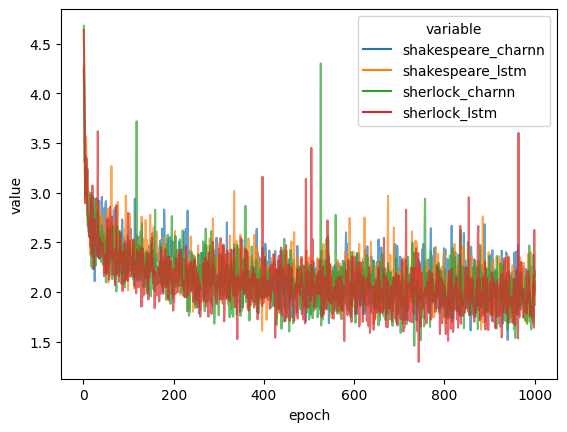

In [61]:
progress_df_long = progress_df.melt(id_vars=['epoch'], value_vars=[col for col in progress_df.columns if not col == 'epoch'])
sns.lineplot(data=progress_df_long, x='epoch', y='value', hue='variable', alpha=0.7)

In [60]:
def moving_average(x, w=3):
    return np.concatenate((np.array([np.nan] * (w-1)), np.convolve(x, np.ones(w), 'valid') / w))

In [58]:
smoothed_progress_df = progress_df.copy()

for col in smoothed_progress_df.columns:
    if col == 'epoch':
        continue
    else:
        smoothed_progress_df[col] = moving_average(smoothed_progress_df[col], w=200)

<AxesSubplot: xlabel='epoch', ylabel='value'>

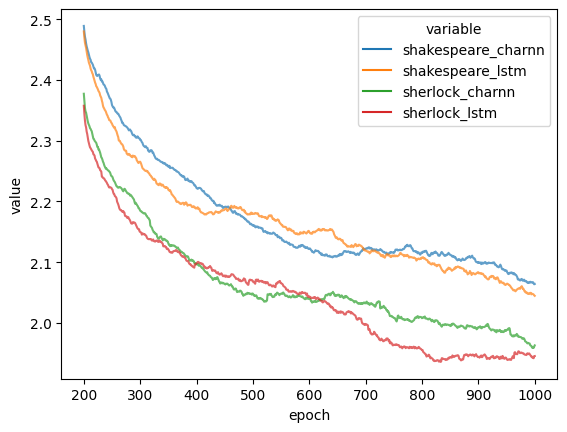

In [59]:
smoothed_progress_df_long = smoothed_progress_df.melt(id_vars=['epoch'], value_vars=[col for col in smoothed_progress_df.columns if not col == 'epoch'])
sns.lineplot(data=smoothed_progress_df_long, x='epoch', y='value', hue='variable', alpha=0.7)